Задачи для первой лабораторной работы:

1) Визуализировать данные

2) Написать обучающийся алгоритм для фитирования этих данных (порядок кривой подбирать эмпирически)

3) Получить в результате кривую, аппроксимирующую эти данные (изобразить на графике), вывести функцию ошибки.
 
Не прибегайте к использованию библиотек для построения и обучения нейронных сетей (вроде tf и pytorch).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Глубокое обучение/curve.txt', delimiter = '\t', names=['x', 'y']).sort_values("x")  

In [ ]:
df.head()

,x,y
140,-0.980512,2.468865
166,-0.966187,2.281423
182,-0.965306,2.251840
141,-0.940733,2.166412
53,-0.939782,2.131272


## **1) Визуализировать данные**

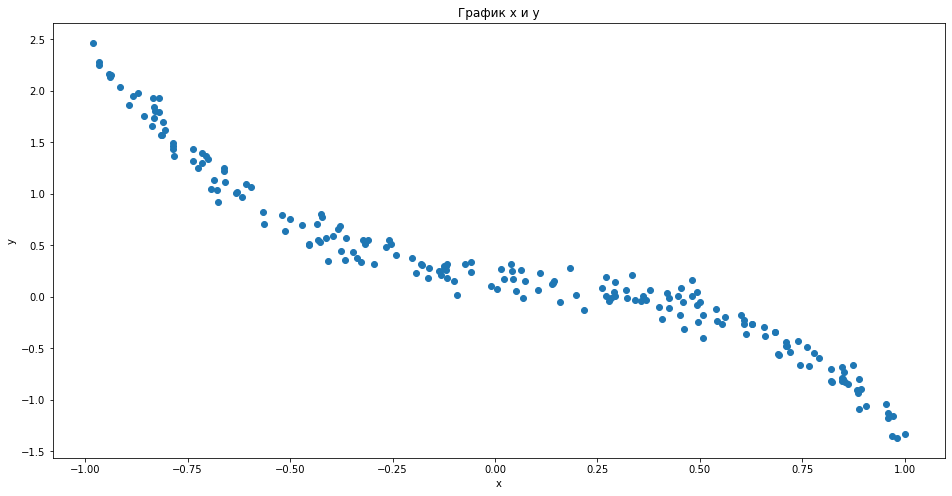

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.scatter(df['x'], df['y'])
plt.title('График x и y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## **2) Написать обучающийся алгоритм для фитирования этих данных (порядок кривой подбирать эмпирически)**

In [ ]:
x = df['x'].values
y = df['y'].values

In [ ]:
def create_polynomial_features(X, degree):
    X_poly = np.ones((len(X), degree+1))
    for i in range(1, degree+1):
        X_poly[:, i] = X ** i
    return X_poly

score = 100000
best_degree = 0

for i in range(1, 19):
    X_poly = create_polynomial_features(x, i)
    weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    y_predict = X_poly @ weights
    mse = np.mean((y - y_predict)**2)

    if mse < score:
        score = mse
        best_degree = i

print(f"BEST DEGREE: {best_degree}, BEST MSE: {score}")


BEST DEGREE: 18, BEST MSE: 0.009708886141606555


## **3) Получить в результате кривую, аппроксимирующую эти данные (изобразить на графике), вывести функцию ошибки.**

MSE: 0.009696108519627216


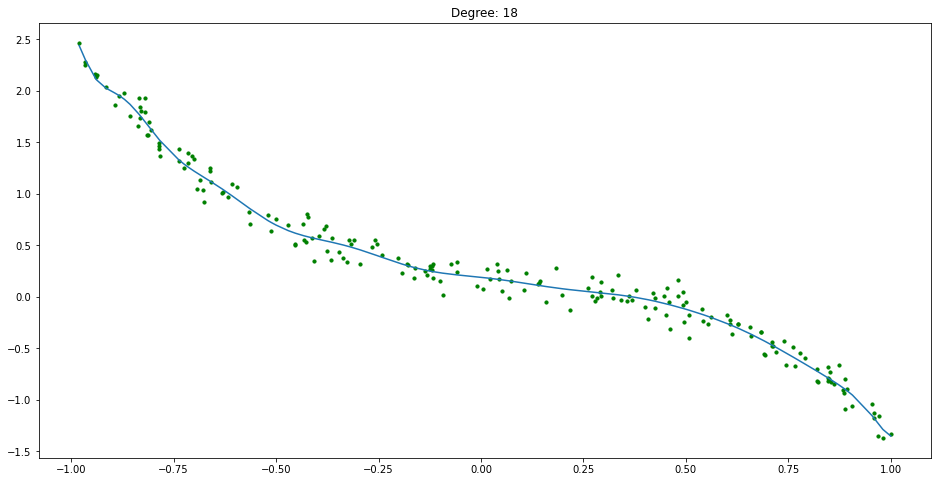

In [ ]:
X_poly = create_polynomial_features(x, 19)
weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
y_predict = X_poly @ weights

plt.figure(figsize=(16, 8))
plt.scatter(x, y, s = 10, c = 'g')
plt.plot(x, y_predict)

plt.title("Degree: " + str(18))

print("MSE: " + str(np.mean((y - y_predict)**2)))

Даже не смотря на то, что модель показала такой хороший результат, это не значит, что она хорошо подходит для обучения. Видно, что на полиноме 19 степени есть переобучение, что не будет универсальным решением для наших задач.

MSE: 0.010140730761829206


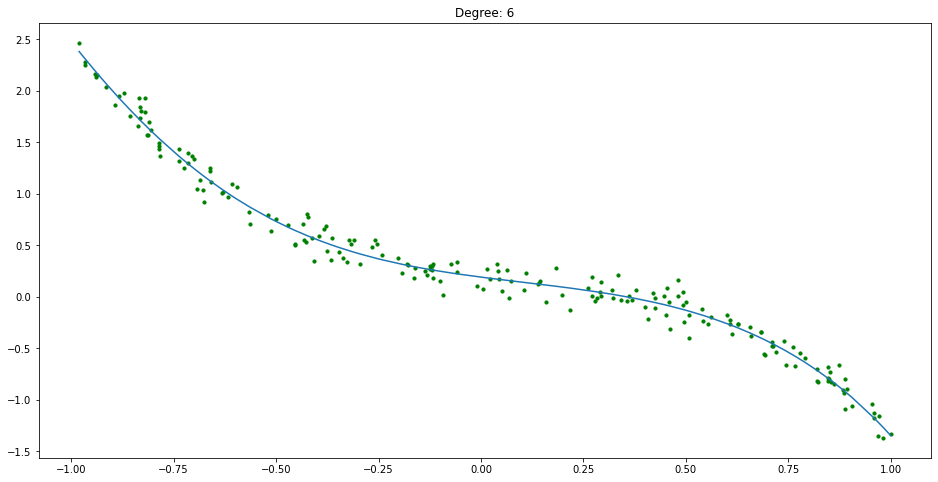

In [ ]:
X_poly = create_polynomial_features(x, 6)
weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
y_predict = X_poly @ weights

plt.figure(figsize=(16, 8))
plt.scatter(x, y, s = 10, c = 'g')
plt.plot(x, y_predict)

plt.title("Degree: " + str(6))
mse = np.mean((y - y_predict)**2)
print("MSE: " + str(mse))

**6 степень** полином идельно подходит для нашей задачи, поэтому было принято решенеи оставить именно ее!